## Installation

In [1]:
## Pip install method (recommended)
#!pip install ultralytics
#!pip install utils.plots


## Imports

In [2]:
#fundamental
import numpy
import utils

#OS and sys
import os


#Dispaly iamges
from PIL import Image
from IPython.display import display


#yolo
from ultralytics import YOLO
import torch

In [3]:
!nvidia-smi

Fri May 26 20:27:54 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    38W / 300W |      0MiB / 16384MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Define directory

In [4]:
# Define root directory
ROOT_PATH = os.path.normpath(os.getcwd() + os.sep + os.pardir)
print(ROOT_PATH)

/home/farid_javadnejad/power_line_inspection_yolov8


In [5]:
import torch
print(torch.cuda.is_available())

#GPU or CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

True
cuda


In [6]:
print(torch.cuda.device_count())

1


## Train

In [7]:
#Data configs
data_yaml = ROOT_PATH + '/data/data.yaml'


#Modeling settings
imgsz = 768
batch_size = 512
epoch_size = 5000
optimizer = 'SGD'   #optimizer to use, choices=['SGD', 'Adam', 'AdamW', 'RMSProp']
pretrained = False      #whether to use a pretrained model
lr0 = 0.001             #initial learning rate (i.e. SGD=1E-2, Adam=1E-3)
resume = False          #resume training from last checkpoint
momentum =0.937          #SGD momentum/Adam beta1
weight_decay = 0.0005   #optimizer weight decay 5e-4
patience = 200


#Pretrianed model configs
if pretrained:
    trained_model = ROOT_PATH + '/notebooks/runs/detect/best.pt'
else:
    trained_model = 'yolov8n.yaml'

model = YOLO(trained_model) 


#Train
results = model.train(mode='detect',
                      data=data_yaml,
                      epochs=epoch_size,
                      imgsz=imgsz,
                      batch=batch_size,
                      optimizer = optimizer,
                      pretrained = pretrained,
                      lr0 = lr0,
                      resume = resume,
                      device = 1,
                      weight_decay = weight_decay,
                      patience = patience)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     2/5000      13.8G       4.23      5.115      4.424        466        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     3/5000        14G      4.026      4.958      4.384        463        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42          0          0          0          0

      Epo

    22/5000      13.8G      4.047       5.04      4.318        351        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    23/5000        14G      4.125      5.034      4.231        351        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    24/5000      13.8G      4.177      5.013       4.28        417        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|████


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    43/5000      13.7G      4.062      4.723      4.123        392        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    44/5000      13.8G      4.149      4.736      4.167        403        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    45/5000      13.8G      4.144      4.744      4.149        406        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    64/5000      13.8G      3.992      4.509      4.069        423        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    65/5000      13.8G       3.98      4.482      4.078        431        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    66/5000      13.8G      4.023      4.514      4.041        412        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    85/5000      13.8G      4.083      4.324      3.987        434        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    86/5000        14G       3.94      4.394      3.977        360        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
    87/5000      13.8G      4.099      4.339      3.986        474        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   106/5000        14G      3.994      4.187      3.931        363        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42   0.000524      0.113     0.0206     0.0081

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   107/5000        14G      3.839       4.05      3.915        408        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42   0.000805      0.125     0.0335     0.0133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   108/5000      13.8G      3.972      4.241      3.912        392        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   127/5000      13.8G      3.699      4.032      3.794        357        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.893     0.0225     0.0221    0.00844

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   128/5000      13.8G      3.651      3.787      3.784        428        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42       0.89      0.025     0.0221    0.00871

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   129/5000      13.8G      3.559      3.776       3.78        358        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   148/5000      13.8G      3.188      3.511      3.578        339        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.552      0.174     0.0848     0.0334

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   149/5000      13.8G      3.215       3.42      3.576        405        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.745      0.138       0.11     0.0338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   150/5000      13.7G        3.3      3.398      3.515        399        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   169/5000      13.7G      2.967      3.322      3.366        379        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.633      0.163     0.0276     0.0108

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   170/5000      13.9G      3.017      3.049      3.288        484        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.633      0.175     0.0216    0.00736

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   171/5000      13.8G      2.926      3.237      3.322        382        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   190/5000      13.8G      2.879      3.089      3.181        448        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.802       0.21      0.207     0.0791

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   191/5000        14G      2.853      2.996      3.191        451        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.759       0.21      0.206     0.0774

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   192/5000      13.7G      2.885      3.137      3.168        353        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   211/5000      13.8G       2.82      2.985      3.032        378        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.517       0.14      0.112     0.0445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   212/5000      13.8G      2.808      2.979      3.077        417        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.532      0.219      0.149     0.0527

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   213/5000        14G      2.802      2.997      3.149        366        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   232/5000      13.9G      2.626      2.853      2.965        385        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.842      0.182      0.222     0.0921

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   233/5000      13.7G      2.647      2.781      2.888        381        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.847      0.196      0.226      0.102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   234/5000      13.8G      2.613      2.828      2.998        409        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   253/5000      13.9G      2.638      2.719      2.899        406        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.962        0.1      0.167     0.0804

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   254/5000      13.7G      2.542      2.678      2.752        440        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.357       0.15      0.154     0.0801

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   255/5000      13.8G      2.536      2.605      2.784        443        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   274/5000      13.8G      2.399      2.605      2.666        374        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.228       0.21      0.191     0.0894

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   275/5000      13.7G      2.487      2.584      2.752        434        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.194      0.224      0.178     0.0889

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   276/5000        14G      2.512      2.685       2.78        370        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   295/5000      13.8G      2.467      2.711      2.718        388        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.166      0.182      0.163     0.0816

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   296/5000      13.8G      2.352      2.632      2.693        332        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.173      0.174      0.165     0.0808

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   297/5000      13.9G      2.407      2.634      2.682        366        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   316/5000      13.9G      2.343      2.385      2.633        453        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.666      0.163      0.192     0.0999

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   317/5000      13.8G      2.453      2.571      2.675        418        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.697      0.163      0.186      0.108

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   318/5000      13.7G       2.37      2.655      2.746        341        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   337/5000      13.8G        2.3      2.309      2.514        438        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42       0.43      0.166      0.209      0.101

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   338/5000      13.7G      2.309      2.449      2.583        373        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.491      0.149      0.192     0.0974

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   339/5000      13.7G      2.263      2.341      2.572        431        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   358/5000      13.8G      2.219      2.369      2.536        346        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.574      0.163      0.195      0.104

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   359/5000      13.7G      2.259      2.294       2.54        408        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.781      0.163      0.186      0.101

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   360/5000      13.7G      2.254      2.359      2.538        385        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   379/5000      13.9G      2.229      2.321      2.512        408        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.634      0.163      0.188     0.0991

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   380/5000      13.8G      2.084      2.249      2.518        357        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42       0.56      0.181      0.194      0.106

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   381/5000        14G      2.117      2.253      2.458        347        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   400/5000      13.8G      2.213      2.203      2.428        435        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.644      0.219      0.208      0.096

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   401/5000      13.8G      2.125      2.234      2.492        397        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.641      0.206      0.164     0.0645

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   402/5000      13.8G      2.111      2.098      2.416        462        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   421/5000      13.7G       2.06      2.103      2.412        388        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.522       0.21      0.218      0.108

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   422/5000        14G      2.145      2.161      2.441        407        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.532      0.204      0.225       0.11

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   423/5000      13.9G      2.169      2.085      2.372        459        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   442/5000      13.8G      1.999      2.046      2.385        396        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.228      0.203      0.223      0.102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   443/5000      13.9G      2.064      2.024       2.31        455        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.669      0.198      0.225      0.104

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   444/5000        14G      2.029      2.038       2.33        419        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   463/5000      13.8G      2.062      2.103      2.356        390        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.553      0.218      0.222     0.0977

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   464/5000      13.8G      2.062      1.977      2.349        417        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.842        0.2      0.222     0.0994

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   465/5000      13.7G      1.943      1.915      2.254        428        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   484/5000      13.8G      2.096       2.07      2.345        423        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.676      0.217      0.205      0.102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   485/5000      13.7G      2.116      2.091      2.322        397        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.669      0.208      0.212      0.104

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   486/5000        14G      1.997      1.986      2.296        424        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   505/5000      13.8G      1.917      1.855      2.255        430        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.676      0.231      0.219       0.11

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   506/5000        14G      1.829      1.864      2.206        387        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.702      0.246      0.221      0.117

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   507/5000      13.8G      1.934       1.85      2.248        459        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   526/5000        14G      1.843      1.887      2.265        320        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.895      0.197      0.231      0.117

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   527/5000      13.7G      1.881      1.856      2.212        423        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.904      0.194      0.236      0.109

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   528/5000        14G      2.008      2.026      2.286        383        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   547/5000      13.8G      1.835      1.763      2.134        411        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.525      0.258      0.244      0.125

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   548/5000      13.8G      2.045      1.955      2.188        429        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.513      0.235      0.252      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   549/5000        14G      1.831      1.779      2.144        447        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   568/5000      13.7G      1.874      1.754      2.165        399        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.583      0.199      0.231      0.108

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   569/5000      13.8G      1.852       1.81      2.163        381        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.604      0.184      0.208     0.0948

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   570/5000        14G      1.835      1.854      2.179        390        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   589/5000      13.8G      1.889      1.739      2.125        422        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.608      0.208      0.223      0.115

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   590/5000      13.8G      1.828       1.69      2.065        444        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.683      0.216       0.24      0.116

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   591/5000      13.7G       1.71      1.726      2.144        363        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   610/5000        14G      1.745      1.695      2.073        438        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.826      0.221      0.266      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   611/5000      13.7G      1.783      1.639      2.091        436        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42       0.87      0.221      0.271      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   612/5000      13.7G      1.743      1.748      2.113        379        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   631/5000        14G      1.661      1.593      2.065        392        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42       0.63      0.246      0.258      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   632/5000      13.8G      1.774      1.711      2.039        377        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.655      0.246      0.262      0.142

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   633/5000      13.8G      1.804      1.711      2.057        370        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   652/5000        14G      1.683      1.672        2.1        407        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.622      0.258      0.262      0.148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   653/5000      13.7G      1.752      1.647      2.026        403        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.869      0.235      0.262      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   654/5000        14G      1.649      1.586      2.011        433        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   673/5000      13.8G      1.701      1.586      2.018        419        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.664      0.197      0.232       0.12

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   674/5000        14G      1.628      1.625      2.004        324        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.681      0.212      0.247       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   675/5000      13.7G      1.789      1.658      2.069        403        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   694/5000      13.9G      1.701      1.508      1.927        441        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42       0.74      0.253       0.28      0.127

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   695/5000      13.8G       1.68      1.643      2.046        357        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.936      0.253      0.275      0.128

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   696/5000      13.7G      1.646      1.547      2.062        381        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   715/5000      13.8G      1.629      1.689      1.991        345        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.916       0.21       0.25      0.131

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   716/5000      13.8G      1.753      1.602      2.034        399        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.894      0.222      0.264      0.135

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   717/5000      13.8G      1.715      1.661      2.071        424        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   736/5000      13.8G      1.633      1.471      1.916        448        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.712      0.258      0.276      0.144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   737/5000      13.8G      1.451      1.386      1.848        435        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.679      0.258      0.277      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   738/5000      13.7G       1.58      1.494      1.903        437        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   757/5000      13.7G      1.646      1.551          2        424        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.904      0.221      0.259      0.115

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   758/5000      13.9G      1.496      1.435      1.871        421        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.852      0.221      0.256      0.121

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   759/5000      13.8G      1.594      1.475      1.919        411        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   778/5000      13.6G      1.602      1.511      1.937        432        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.667      0.256       0.27       0.13

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   779/5000      13.8G       1.65      1.568      1.922        351        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.604      0.248      0.271      0.127

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   780/5000        14G      1.509      1.468      1.877        394        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   799/5000      13.9G       1.52      1.516      1.874        317        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.705      0.258      0.269      0.139

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   800/5000        14G      1.492      1.395      1.853        422        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.668      0.248       0.27      0.146

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   801/5000      13.9G      1.491      1.417      1.912        452        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   820/5000      13.8G      1.491      1.461       1.86        445        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.522      0.241      0.269      0.134

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   821/5000      13.8G      1.483      1.326      1.834        451        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.526      0.242      0.272      0.129

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   822/5000        14G      1.572      1.458      1.838        419        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   841/5000      13.8G      1.517      1.374      1.884        441        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.361      0.258      0.278      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   842/5000        14G      1.521      1.387      1.835        421        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.638      0.258      0.283      0.143

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   843/5000      13.8G      1.433      1.345      1.836        375        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   862/5000      13.9G      1.559      1.388      1.834        452        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.243      0.246       0.24      0.112

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   863/5000      13.8G       1.45      1.356      1.812        382        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.299      0.246      0.234      0.105

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   864/5000      13.8G      1.482      1.338      1.819        449        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   883/5000      13.8G      1.497      1.405      1.824        391        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.835      0.236      0.273     0.0992

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   884/5000        14G      1.426      1.355      1.806        452        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.584      0.224      0.247      0.109

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   885/5000      13.8G      1.481      1.347      1.772        447        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   904/5000      13.9G      1.608      1.487      1.923        434        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.952      0.256      0.292      0.138

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   905/5000      13.8G      1.423      1.368      1.763        434        768: 100%|██████████| 1/1 [00:00<00:00
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [
                   all         15         42      0.893      0.258      0.292      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
   906/5000      13.7G      1.453      1.311      1.771        470        768: 100%|██████████| 1/1 [00:00<00:00
                 Cla

## Results

In [8]:
save_dir = ROOT_PATH + '/notebooks/'+ str(model.trainer.save_dir) + '/'
print(save_dir)

/home/farid_javadnejad/power_line_inspection_yolov8/notebooks/runs/detect/train9/


#################################### results.png ####################################


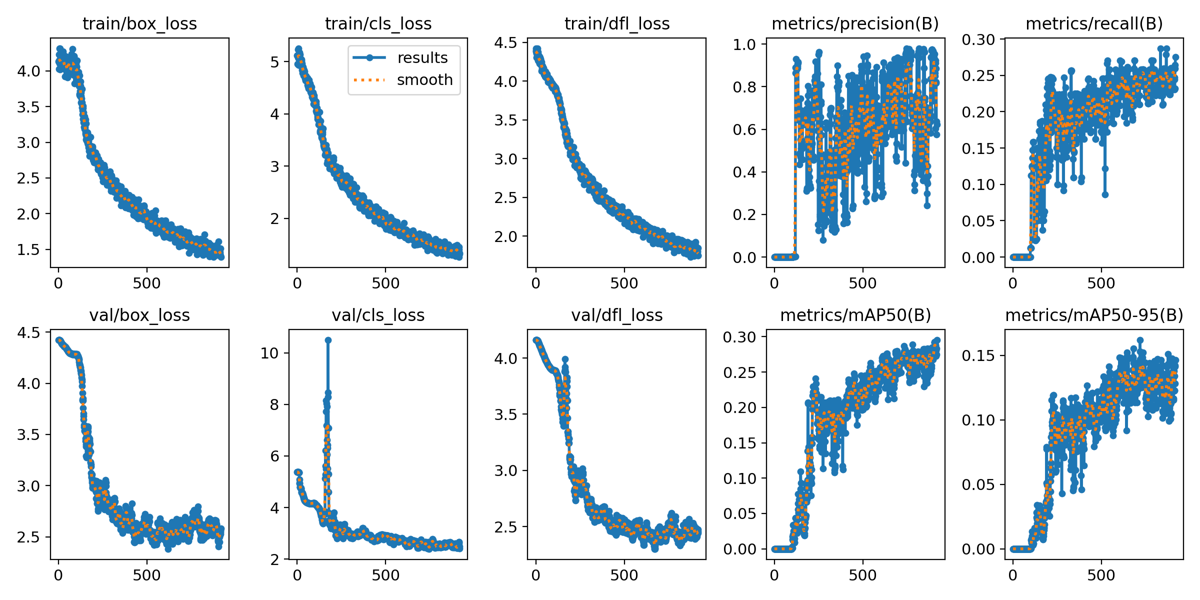

#################################### confusion_matrix_normalized.png ####################################


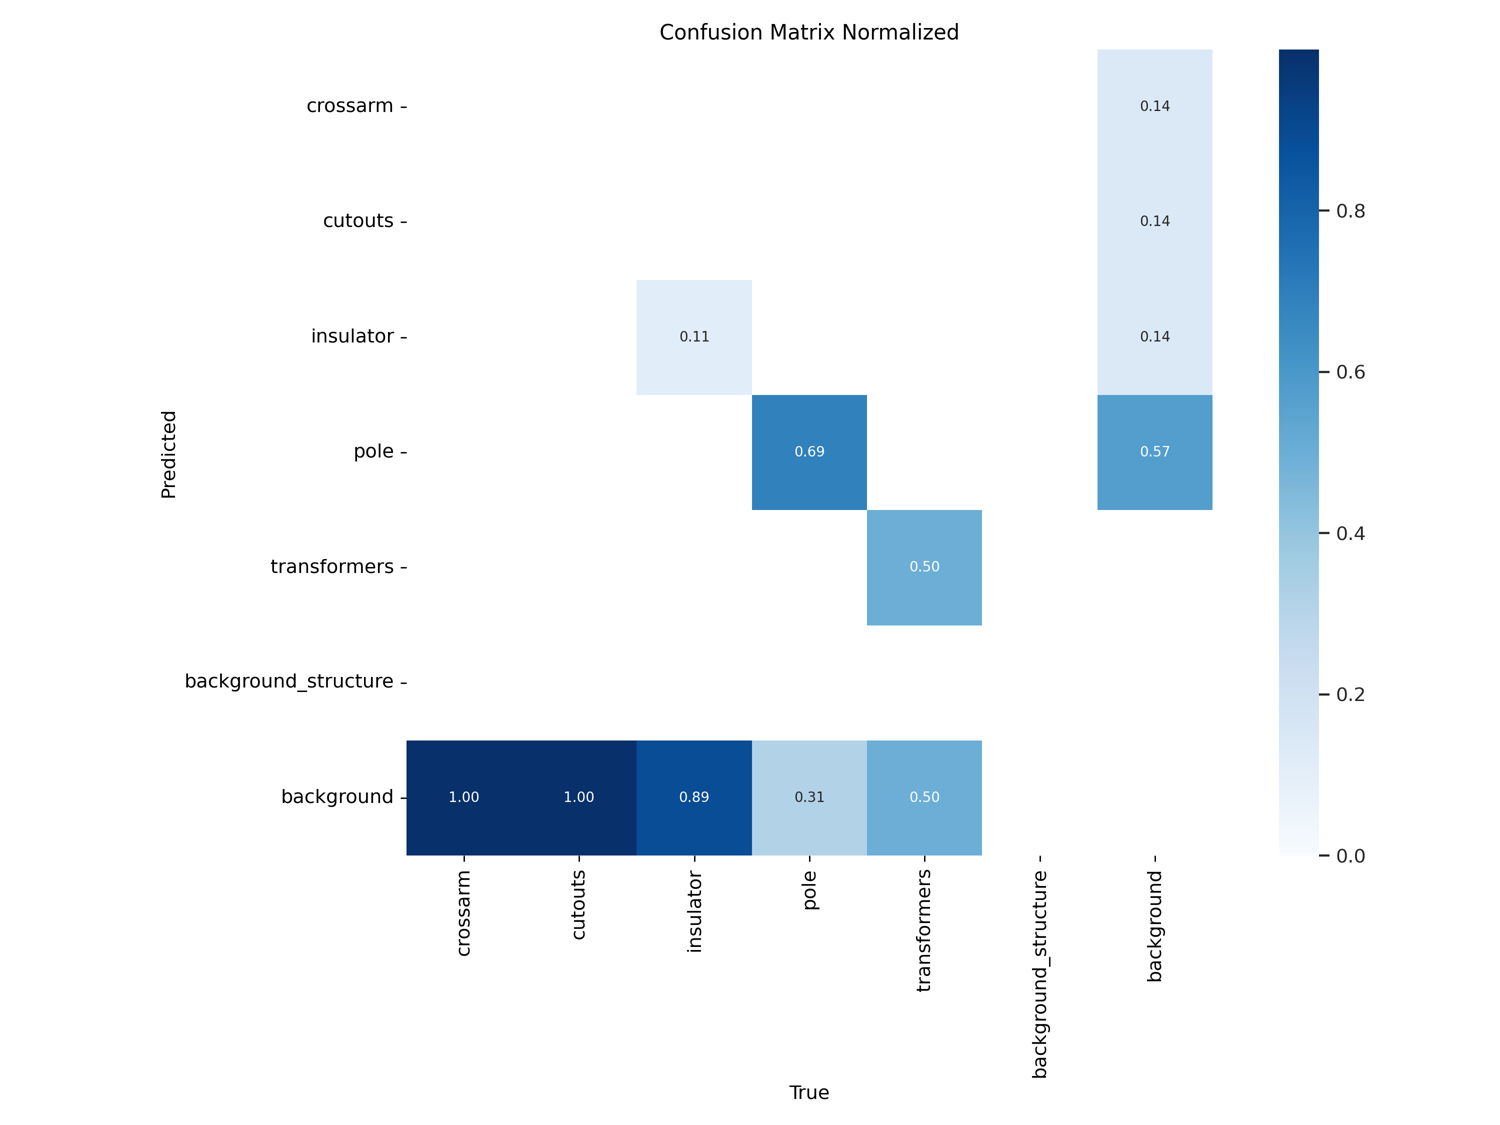

#################################### train_batch1.jpg ####################################


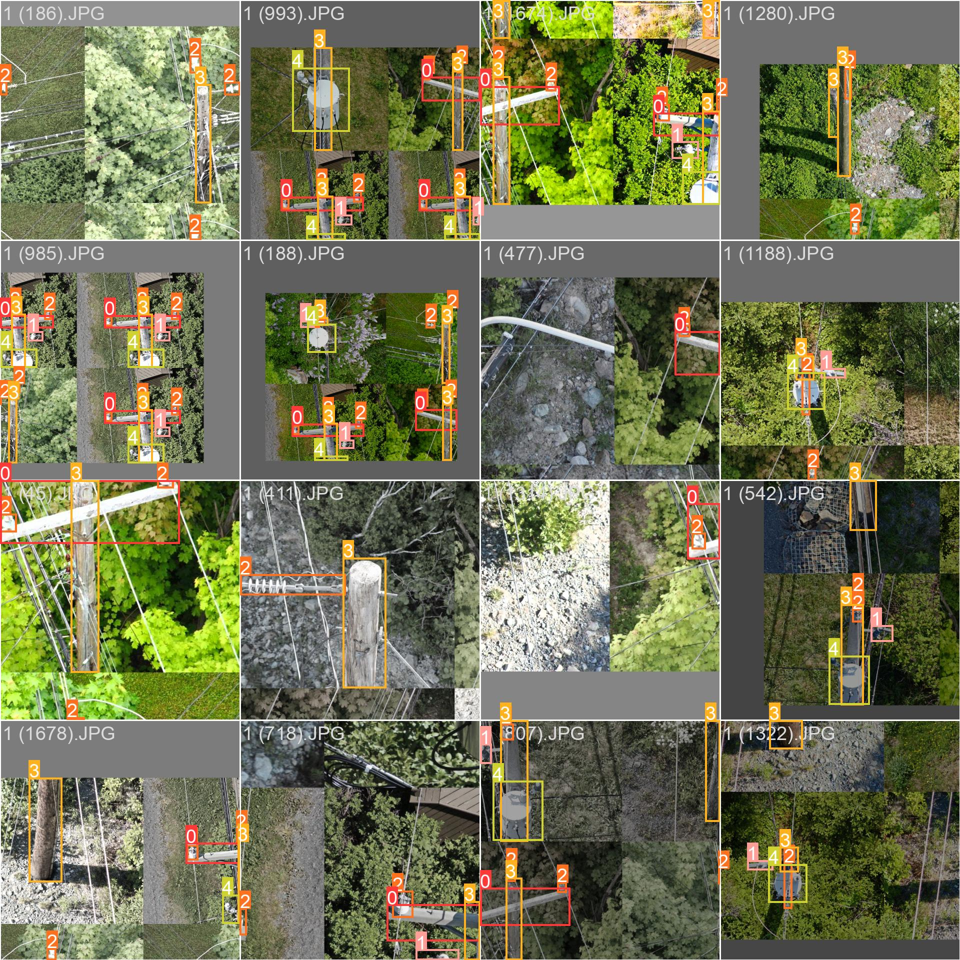

#################################### val_batch0_pred.jpg ####################################


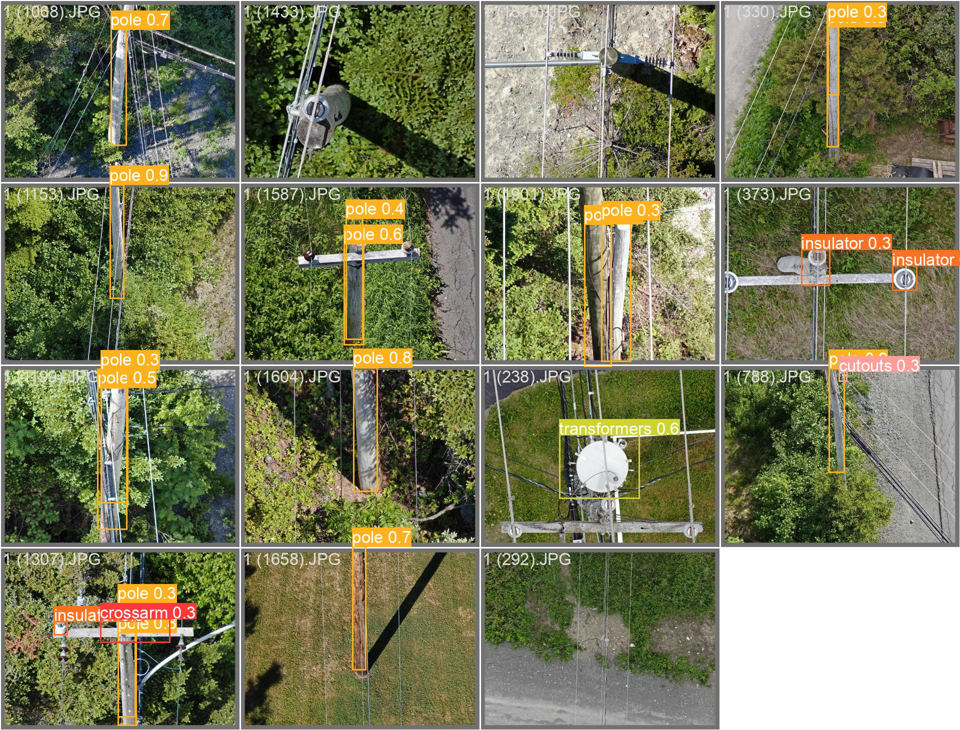

In [9]:
open_images =['results.png',
              'confusion_matrix_normalized.png',
              'train_batch1.jpg',
              'val_batch0_pred.jpg']

percentage = 50  # Resize by 50% (change this value as needed)

for img_open in open_images:
    
    print('#################################### ' + img_open + ' ####################################')
    
    image = Image.open(save_dir + img_open)
    
    # Calculate new width and height based on the percentage
    width, height = image.size
    new_width = int(width * (percentage / 100))
    new_height = int(height * (percentage / 100))
    
    # Resize the image while maintaining the aspect ratio
    resized_image = image.resize((new_width, new_height))
    display(resized_image)